# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key
from datetime import datetime

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

633


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [6]:
city=[]
lat=[]
lng=[]
humidity=[]
clouds=[]
windspeed=[]
country=[]
date=[]
max_temp=[]
weather_dict ={"City": city,"Latitude":lat,"Longitude":lng,"Max Temperature (F)": max_temp,"Humidity (%)":humidity,"Cloudiness (%)":clouds,"Wind Speed (mph)":windspeed,"Country": country,"Date":date}
j=1
print("Beginning Data Retrieval\n-----------------------------")
#Build query url
for i in range(len(cities)):
    url=f'https://api.openweathermap.org/data/2.5/weather?q={cities[i]}&units=imperial&appid={weather_api_key}'
    #get weather data
    weather_response = requests.get(url)
    weather_json=weather_response.json()
    try:
        city.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(round(weather_json['main']['temp_max'],2))
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(time.strftime('%D %H:%M', time.localtime(int(weather_json['dt']))))
        if i == j*50:
            j+=1
        print(f"Processing Record {i+1} of set {j} | {city[-1]}")
    except KeyError:
        if i == j*50:
            j+=1
        print("City not found. Skipping...")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | Kapaa
Processing Record 2 of set 1 | Forsytheganj
Processing Record 3 of set 1 | Saint-Philippe
Processing Record 4 of set 1 | Kloulklubed
Processing Record 5 of set 1 | Palmer
Processing Record 6 of set 1 | Cidreira
City not found. Skipping...
Processing Record 8 of set 1 | Cape Town
Processing Record 9 of set 1 | Petropavlovsk-Kamchatskiy
Processing Record 10 of set 1 | Barcelos
Processing Record 11 of set 1 | Terra Santa
Processing Record 12 of set 1 | Thinadhoo
Processing Record 13 of set 1 | Atuona
Processing Record 14 of set 1 | Paamiut
Processing Record 15 of set 1 | Cabo San Lucas
Processing Record 16 of set 1 | Vaini
City not found. Skipping...
Processing Record 18 of set 1 | Ogaminana
Processing Record 19 of set 1 | Mahon
Processing Record 20 of set 1 | Jamestown
Processing Record 21 of set 1 | Hilo
Processing Record 22 of set 1 | Mataura
Processing Record 23 of set 1 | Yellowknife
Processin

Processing Record 200 of set 4 | Portel
City not found. Skipping...
City not found. Skipping...
Processing Record 203 of set 5 | Nanortalik
Processing Record 204 of set 5 | Olinda
Processing Record 205 of set 5 | Basco
City not found. Skipping...
Processing Record 207 of set 5 | Nantucket
Processing Record 208 of set 5 | Saint Thomas
Processing Record 209 of set 5 | Mayumba
Processing Record 210 of set 5 | Bilma
Processing Record 211 of set 5 | Guaraniaçu
Processing Record 212 of set 5 | Linxia Chengguanzhen
Processing Record 213 of set 5 | Davila
City not found. Skipping...
Processing Record 215 of set 5 | Ulladulla
Processing Record 216 of set 5 | Tasiilaq
Processing Record 217 of set 5 | Saint-Augustin
Processing Record 218 of set 5 | Nizwá
Processing Record 219 of set 5 | Venado Tuerto
Processing Record 220 of set 5 | Torbay
Processing Record 221 of set 5 | Sakakah
Processing Record 222 of set 5 | George Town
Processing Record 223 of set 5 | Mareeba
Processing Record 224 of set 5 |

Processing Record 400 of set 8 | Birao
Processing Record 401 of set 9 | San Fernando del Valle de Catamarca
Processing Record 402 of set 9 | Klaksvík
Processing Record 403 of set 9 | Fereydūnkenār
Processing Record 404 of set 9 | Saint Augustine
Processing Record 405 of set 9 | Chapais
Processing Record 406 of set 9 | Chicama
Processing Record 407 of set 9 | Gurupi
Processing Record 408 of set 9 | Marawi
Processing Record 409 of set 9 | Hasaki
Processing Record 410 of set 9 | Upernavik
Processing Record 411 of set 9 | Kavaratti
Processing Record 412 of set 9 | Magadan
Processing Record 413 of set 9 | Nirmal
Processing Record 414 of set 9 | Serenje
City not found. Skipping...
Processing Record 416 of set 9 | Mildura
Processing Record 417 of set 9 | Alice Springs
Processing Record 418 of set 9 | Bentiu
Processing Record 419 of set 9 | Sitka
Processing Record 420 of set 9 | Mossamedes
Processing Record 421 of set 9 | Naze
Processing Record 422 of set 9 | Srīvardhan
City not found. Skippin

City not found. Skipping...
Processing Record 598 of set 12 | Aksu
Processing Record 599 of set 12 | Alihe
Processing Record 600 of set 12 | Omsukchan
Processing Record 601 of set 13 | Yeppoon
Processing Record 602 of set 13 | Mabopane
Processing Record 603 of set 13 | Manjacaze
Processing Record 604 of set 13 | Tromsø
Processing Record 605 of set 13 | Kasempa
Processing Record 606 of set 13 | Kiunga
Processing Record 607 of set 13 | Smithers
Processing Record 608 of set 13 | Puerto Baquerizo Moreno
Processing Record 609 of set 13 | Malakal
Processing Record 610 of set 13 | Meadow Lake
Processing Record 611 of set 13 | Salalah
City not found. Skipping...
Processing Record 613 of set 13 | Lafiagi
Processing Record 614 of set 13 | Jaru
Processing Record 615 of set 13 | Williamsport
City not found. Skipping...
Processing Record 617 of set 13 | Charters Towers
Processing Record 618 of set 13 | Las Vegas
City not found. Skipping...
Processing Record 620 of set 13 | Cuamba
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
raw_weather_df=pd.DataFrame(weather_dict)
raw_weather_df.to_csv("output_data/raw_city_data.csv",)
raw_weather_df

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Kapaa,22.0752,-159.3190,61.00,82,1,10.36,US,02/06/21 04:21
1,Forsytheganj,52.6333,29.7333,9.28,92,83,7.31,BY,02/06/21 04:24
2,Saint-Philippe,-21.3585,55.7679,87.80,62,40,11.50,RE,02/06/21 04:21
3,Kloulklubed,7.0419,134.2556,77.00,94,90,10.36,PW,02/06/21 04:22
4,Palmer,42.1584,-72.3287,23.00,93,40,10.36,US,02/06/21 04:24
...,...,...,...,...,...,...,...,...,...
571,Fort Nelson,58.8053,-122.7002,-27.40,75,90,0.92,CA,02/06/21 04:26
572,Nueve de Julio,-35.4444,-60.8831,64.00,86,0,1.99,AR,02/06/21 04:26
573,Bassar,9.2500,0.7833,82.40,65,100,6.91,TG,02/06/21 04:26
574,Wismar,53.9000,11.4667,30.99,76,31,8.99,DE,02/06/21 04:26


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
#high_humidity_cities_df
high_humidity_cities_indices=raw_weather_df.loc[raw_weather_df['Humidity (%)']>100].index
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=raw_weather_df.loc[raw_weather_df['Humidity (%)'] <= 100].reset_index()
clean_city_data.to_csv("output_data/clean_city_data.csv")
clean_city_data

,index,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,0,Kapaa,22.0752,-159.3190,61.00,82,1,10.36,US,02/06/21 04:21
1,1,Forsytheganj,52.6333,29.7333,9.28,92,83,7.31,BY,02/06/21 04:24
2,2,Saint-Philippe,-21.3585,55.7679,87.80,62,40,11.50,RE,02/06/21 04:21
3,3,Kloulklubed,7.0419,134.2556,77.00,94,90,10.36,PW,02/06/21 04:22
4,4,Palmer,42.1584,-72.3287,23.00,93,40,10.36,US,02/06/21 04:24
...,...,...,...,...,...,...,...,...,...,...
571,571,Fort Nelson,58.8053,-122.7002,-27.40,75,90,0.92,CA,02/06/21 04:26
572,572,Nueve de Julio,-35.4444,-60.8831,64.00,86,0,1.99,AR,02/06/21 04:26
573,573,Bassar,9.2500,0.7833,82.40,65,100,6.91,TG,02/06/21 04:26
574,574,Wismar,53.9000,11.4667,30.99,76,31,8.99,DE,02/06/21 04:26


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Max Temperature

From the plot below, we can conclude that temperatures in the southern hemisphere are warmer than the temperatures in the northern hemiphere. The equator is at 0 degrees latitude and has some of the higher temperatures. Positive degrees latitude numbers are in the northern hemisphere and negative numbers are in the souther hemisphere. This data is current data in Feburary 2021. The northern hemisphere is in winter and the southern hemisphere is in summer. 

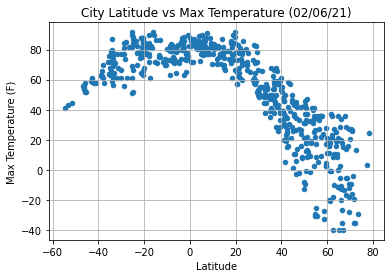

In [9]:
date= clean_city_data.Date.tolist()[0][0:8]
ax1 = clean_city_data.plot.scatter(x="Latitude", y="Max Temperature (F)")
ax1.set_title(f"City Latitude vs Max Temperature ({date})")
ax1.grid(True)
plt.savefig(f"output_data/City_Latitude_vs_Max_Temperature_Scatter_Plot.png")
plt.show()

##(Latitude vs. Humidity Plot)
From the plot below, we can conclude that there are a lot more high humidity cities in the world than there are low humidity cities. It also appears that there slightly more dense cluster of high humidity cities in the north, just slighlty. 

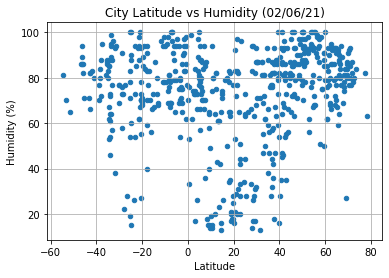

In [10]:
ax2 = clean_city_data.plot.scatter(x="Latitude", y="Humidity (%)")
ax2.set_title(f"City Latitude vs Humidity ({date})")
ax2.grid(True)
plt.savefig(f"output_data/City_Latitude_vs_Humidity_Scatter_Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot
From the plot below, we can see that different cloud coverage percentages are spread pretty evenly across all latitudes. However, there are bit more cities with zero or full cloud coverage.

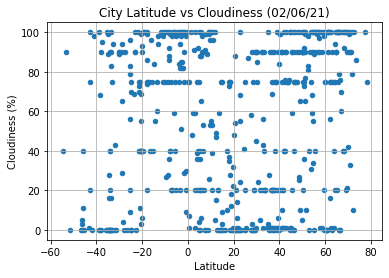

In [11]:
ax3 = clean_city_data.plot.scatter(x="Latitude", y="Cloudiness (%)")
ax3.set_title(f"City Latitude vs Cloudiness ({date})")
ax3.grid(True)
plt.savefig(f"output_data/City_Latitude_vs_Cloudiness_Scatter_Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

From the plot below, we can see a dense cluster of cities across all latitudes with low wind speeds. High wind speeds are usually related to severe storms. Storms are outlier events.

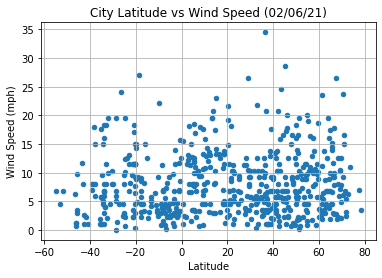

In [12]:
ax4 = clean_city_data.plot.scatter(x="Latitude", y="Wind Speed (mph)")
ax4.set_title(f"City Latitude vs Wind Speed ({date})")
ax4.grid(True)
plt.savefig(f"output_data/City_Latitude_vs_Wind_Speed_Scatter_Plot.png")
plt.show()

## Linear Regression

In [13]:
north_df = clean_city_data.loc[clean_city_data.Latitude>=0].reset_index()
n_lat = north_df.Latitude
north_df

,level_0,index,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,0,0,Kapaa,22.0752,-159.3190,61.00,82,1,10.36,US,02/06/21 04:21
1,1,1,Forsytheganj,52.6333,29.7333,9.28,92,83,7.31,BY,02/06/21 04:24
2,3,3,Kloulklubed,7.0419,134.2556,77.00,94,90,10.36,PW,02/06/21 04:22
3,4,4,Palmer,42.1584,-72.3287,23.00,93,40,10.36,US,02/06/21 04:24
4,7,7,Petropavlovsk-Kamchatskiy,53.0452,158.6483,17.60,62,40,2.24,RU,02/06/21 04:24
...,...,...,...,...,...,...,...,...,...,...,...
389,570,570,Buinsk,54.9500,48.2833,8.60,72,100,20.13,RU,02/06/21 04:26
390,571,571,Fort Nelson,58.8053,-122.7002,-27.40,75,90,0.92,CA,02/06/21 04:26
391,573,573,Bassar,9.2500,0.7833,82.40,65,100,6.91,TG,02/06/21 04:26
392,574,574,Wismar,53.9000,11.4667,30.99,76,31,8.99,DE,02/06/21 04:26


In [14]:
south_df = clean_city_data.loc[clean_city_data.Latitude<0].reset_index()
s_lat=south_df.Latitude
south_df

,level_0,index,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,2,2,Saint-Philippe,-21.3585,55.7679,87.80,62,40,11.50,RE,02/06/21 04:21
1,5,5,Cidreira,-30.1811,-50.2056,66.20,77,89,10.38,BR,02/06/21 04:21
2,6,6,Cape Town,-33.9258,18.4232,80.01,64,20,18.41,ZA,02/06/21 04:16
3,9,9,Terra Santa,-2.1042,-56.4869,73.92,90,82,2.91,BR,02/06/21 04:24
4,11,11,Atuona,-9.8000,-139.0333,80.04,78,27,22.17,PF,02/06/21 04:20
...,...,...,...,...,...,...,...,...,...,...,...
177,560,560,Jaru,-10.4389,-62.4664,72.95,98,100,2.42,BR,02/06/21 04:24
178,562,562,Charters Towers,-20.1000,146.2667,81.09,69,90,15.01,AU,02/06/21 04:26
179,564,564,Cuamba,-14.8031,36.5372,86.14,67,84,2.08,MZ,02/06/21 04:26
180,567,567,Martapura,-3.4167,114.8500,86.00,70,20,6.91,ID,02/06/21 04:22


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
From the plot below, we can see a pretty linear cluster of temperature data as we move from the equator (0 degrees lat) to the the north. Temperature are higher at the equator then drop as we go northward. The high r-square value indicates little variance for this trend. 

The r-squared is: 0.7748066857169569


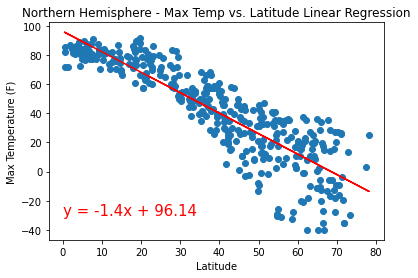

In [15]:
n_max_temp=north_df["Max Temperature (F)"]
(slope_nt, intercept_nt, rvalue_nt, pvalue_nt, stderr_nt) = linregress(n_lat, n_max_temp)
regress_values_nt = n_lat * slope_nt + intercept_nt
line_eq_nt = "y = " + str(round(slope_nt,2)) + "x + " + str(round(intercept_nt,2))
axnt=plt.scatter(n_lat,n_max_temp)
plt.plot(n_lat,regress_values_nt,"r-")
plt.annotate(line_eq_nt,(0,-30),fontsize=15,color="red")
plt.ylabel("Max Temperature (F)")
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig(f"output_data/Northern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")
print(f"The r-squared is: {rvalue_nt**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
The lower r-squared value and plot below shows a bit more variance in the temperatures as we go from the equator south to the south pole. 

The r-squared is: 0.338166434054764


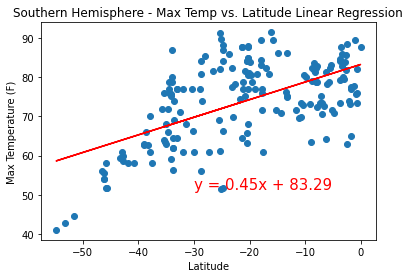

In [16]:
s_max_temp=south_df["Max Temperature (F)"]
(slope_st, intercept_st, rvalue_st, pvalue_st, stderr_st) = linregress(s_lat, s_max_temp)
regress_values_st = s_lat * slope_st + intercept_st
line_eq_st = "y = " + str(round(slope_st,2)) + "x + " + str(round(intercept_st,2))
axst=plt.scatter(s_lat,s_max_temp)
plt.plot(s_lat,regress_values_st,"r-")
plt.annotate(line_eq_st,(-30,51.5),fontsize=15,color="red")
plt.ylabel("Max Temperature (F)")
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig(f"output_data/Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")
print(f"The r-squared is: {rvalue_st**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
The r-square value being lower for humidity levels vs latitude indicates that there more variance and less of a predictable trend of how humidity levels change with a northward direction from the equator. There is a positive slope to the regression line. This indicates that there are slightly more humid cities going northward. 

The r-squared is: 0.1556852186877292


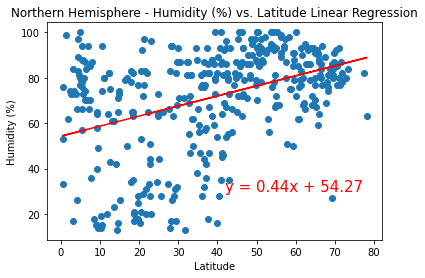

In [17]:
n_humidity=north_df["Humidity (%)"]
(slope_nh, intercept_nh, rvalue_nh, pvalue_nh, stderr_nh) = linregress(n_lat, n_humidity)
regress_values_nh = n_lat * slope_nh + intercept_nh
line_eq_nh = "y = " + str(round(slope_nh,2)) + "x + " + str(round(intercept_nh,2))
axnt=plt.scatter(n_lat,n_humidity)
plt.plot(n_lat,regress_values_nh,"r-")
plt.annotate(line_eq_nh,(42,30),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig(f"output_data/Northern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")
print(f"The r-squared is: {rvalue_nh**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
In southern hemisphere we can see that there is a slight decrease in humidity levels when moving south from the equator. Low r-squared value, indicating the data is a bit less linear. 

The r-squared is: 0.010446643742408031


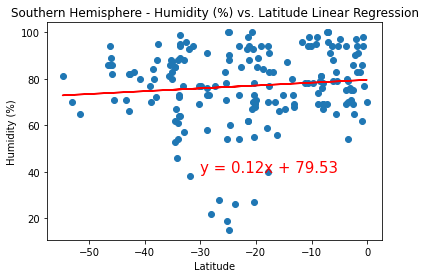

In [18]:
s_humidity=south_df["Humidity (%)"]
(slope_sh, intercept_sh, rvalue_sh, pvalue_sh, stderr_sh) = linregress(s_lat, s_humidity)
regress_values_sh = s_lat * slope_sh + intercept_sh
line_eq_sh = "y = " + str(round(slope_sh,2)) + "x + " + str(round(intercept_sh,2))
axnt=plt.scatter(s_lat,s_humidity)
plt.plot(s_lat,regress_values_sh,"r-")
plt.annotate(line_eq_sh,(-30,40),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig(f"output_data/Southern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")
print(f"The r-squared is: {rvalue_sh**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

From the plot below, we can see that cloudniess increases as linear regression line slope in positive direction towards the higher latitudes and higher cloudiness percentages. This not obvious from just the scatter plot. 

The r-squared is: 0.08267226197680962


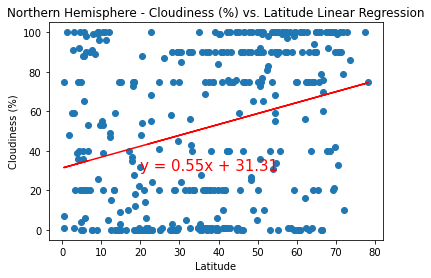

In [19]:
n_cloud=north_df["Cloudiness (%)"]
(slope_nc, intercept_nc, rvalue_nc, pvalue_nc, stderr_nc) = linregress(n_lat, n_cloud)
regress_values_nc = n_lat * slope_nc + intercept_nc
line_eq_nc = "y = " + str(round(slope_nc,2)) + "x + " + str(round(intercept_nc,2))
axnt=plt.scatter(n_lat,n_cloud)
plt.plot(n_lat,regress_values_nc,"r-")
plt.annotate(line_eq_nc,(20,30),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig(f"output_data/Northern_Cloudiness_vs_Latitude_Linear_Regression.png")
print(f"The r-squared is: {rvalue_nc**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

From the plot below, we can see that positively sloped line indicates a higher percentage of cloud coverage near the equator than as we move towards the south pole. Again, this is not obvious if we just look at the scatter plot alone.

The r-squared is: 0.1603438716794576


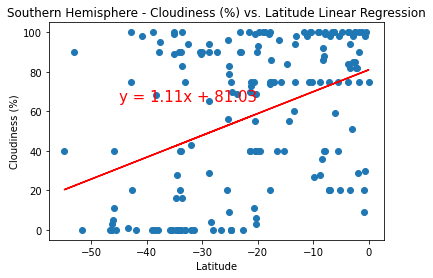

In [20]:
s_cloud=south_df["Cloudiness (%)"]
(slope_sc, intercept_sc, rvalue_sc, pvalue_sc, stderr_sc) = linregress(s_lat, s_cloud)
regress_values_sc = s_lat * slope_sc + intercept_sc
line_eq_sc = "y = " + str(round(slope_sc,2)) + "x + " + str(round(intercept_sc,2))
axnt=plt.scatter(s_lat,s_cloud)
plt.plot(s_lat,regress_values_sc,"r-")
plt.annotate(line_eq_sc,(-45,65),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig(f"output_data/Southern_Cloudiness_vs_Latitude_Linear_Regression.png")
print(f"The r-squared is: {rvalue_sc**2}")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

From the plot and r-squared value below, we can see the wind speed is really not affected by latitude in the northern hemisphere. 

The r-squared is: 0.0012269588288110766


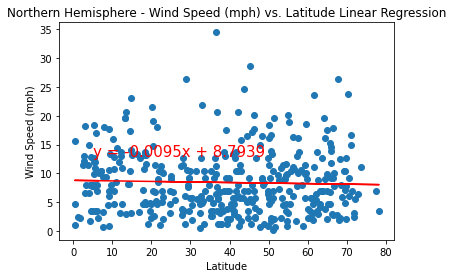

In [21]:
n_ws=north_df['Wind Speed (mph)']
(slope_ns, intercept_ns, rvalue_ns, pvalue_ns, stderr_ns) = linregress(n_lat, n_ws)
regress_values_ns = n_lat * slope_ns + intercept_ns
line_eq_ns = "y = " + str(round(slope_ns,4)) + "x + " + str(round(intercept_ns,4))
axnt=plt.scatter(n_lat,n_ws)
plt.plot(n_lat,regress_values_ns,"r-")
plt.annotate(line_eq_ns,(5,13),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig(f"output_data/Northern_Wind_Speed_vs_Latitude_Linear_Regression.png")
print(f"The r-squared is: {rvalue_ns**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
From the plot and r-squared value below, we can see the wind speed is slightly affected by latitude in the southern hemisphere compared to the northern hemisphere. The regression line has a negative slope, this indicates that wind speed near the equator is just slighlty lower, maybe? 

The r-squared is: 0.007226733112976239


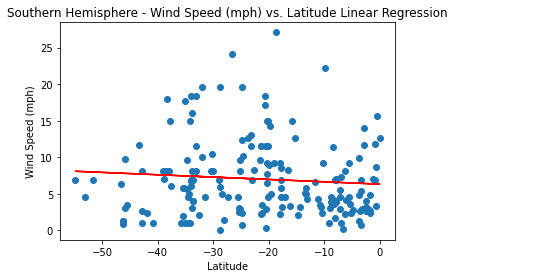

In [22]:
s_ws=south_df['Wind Speed (mph)']
(slope_ss, intercept_ss, rvalue_ss, pvalue_ss, stderr_ss) = linregress(s_lat, s_ws)
regress_values_ss = s_lat * slope_ss + intercept_ss
line_eq_ss = "y = " + str(round(slope_ss,2)) + "x + " + str(round(intercept_ss,2))
axnt=plt.scatter(s_lat,s_ws)
plt.plot(s_lat,regress_values_ss,"r-")
plt.annotate(line_eq_ss,(5,13),fontsize=15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig(f"output_data/Southern_Wind_Speed_vs_Latitude_Linear_Regression.png")
print(f"The r-squared is: {rvalue_ss**2}")
plt.show()